In [1]:
from graph_tool.all import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
graphs_path = os.path.join(os.environ['HOME'],
                             'fits/uoineuro/coupling/graphs')

# V1 Community Detection

In [3]:
v1_baseline_graph_path = os.path.join(graphs_path, 'v1_glmnet_2.graphml')
v1_uoi_graph_path = os.path.join(graphs_path, 'v1_uoi_poisson_2.graphml')
v1_preferences_path = os.path.join(graphs_path, 'v1_preferences.npy')

In [4]:
v1_glmnet = load_graph(v1_baseline_graph_path)
v1_uoi_poisson = load_graph(v1_uoi_graph_path)
v1_preferences = np.load(v1_preferences_path)

In [5]:
v1_color_scalings = 2 * 255 * (v1_preferences / np.max(v1_preferences))
v1_color_scalings = v1_color_scalings.astype('int')
v1_colors = plt.get_cmap('twilight')(v1_color_scalings)

In [11]:
baseline_state = minimize_nested_blockmodel_dl(v1_glmnet, B_min=10)
uoi_state = minimize_nested_blockmodel_dl(v1_uoi_poisson, B_min=10)

In [12]:
baseline_colors = v1_glmnet.new_vertex_property("vector<float>") 
for idx, vertex in enumerate(v1_glmnet.vertices()):
    baseline_colors[vertex] = v1_colors[idx]
    
uoi_colors = v1_uoi_poisson.new_vertex_property("vector<float>") 
for idx, vertex in enumerate(v1_uoi_poisson.vertices()):
    uoi_colors[vertex] = v1_colors[idx]

In [17]:
baseline_state.draw(vertex_fill_color=baseline_colors,
                    vertex_color=baseline_colors,
                    output='v1_baseline.png')
baseline_state.draw(vertex_fill_color=baseline_colors,
                    vertex_color=baseline_colors,
                    output='v1_baseline.pdf')

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x143eb7ad0, at 0x10a14de90>,
 <Graph object, directed, with 102 vertices and 101 edges at 0x143edf890>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x143edf890, at 0x10a119990>)

In [18]:
uoi_state.draw(vertex_fill_color=uoi_colors,
               vertex_color=uoi_colors,
               output='v1_uoi.png')
uoi_state.draw(vertex_fill_color=uoi_colors,
               vertex_color=uoi_colors,
               output='v1_uoi.pdf')

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x143e6ced0, at 0x10a121910>,
 <Graph object, directed, with 101 vertices and 100 edges at 0x16c1622d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16c1622d0, at 0x16c162990>)

# M1 Community Detection

In [52]:
m1_baseline_graph_path = os.path.join(graphs_path, 'm1_glmnet_1.graphml')
m1_uoi_graph_path = os.path.join(graphs_path, 'm1_uoi_poisson_1.graphml')
m1_preferences_path = os.path.join(graphs_path, 'm1_preferences.npy')

In [53]:
m1_baseline = load_graph(m1_baseline_graph_path)
m1_uoi_poisson = load_graph(m1_uoi_graph_path)
m1_preferences = np.load(m1_preferences_path, allow_pickle=True)

In [54]:
m1_color_scalings = 2 * 255 * (m1_preferences[0] / np.max(m1_preferences[0]))
m1_color_scalings = m1_color_scalings.astype('int')
m1_colors = plt.get_cmap('twilight')(m1_color_scalings)

In [59]:
m1_baseline_state = minimize_nested_blockmodel_dl(m1_baseline, B_min=10)
m1_uoi_state = minimize_nested_blockmodel_dl(m1_uoi_poisson, B_min=10)

In [60]:
m1_baseline_colors = m1_baseline.new_vertex_property("vector<float>") 
for idx, vertex in enumerate(m1_baseline.vertices()):
    m1_baseline_colors[vertex] = m1_colors[idx]
    
m1_uoi_colors = m1_uoi_poisson.new_vertex_property("vector<float>") 
for idx, vertex in enumerate(m1_uoi_poisson.vertices()):
    m1_uoi_colors[vertex] = m1_colors[idx]

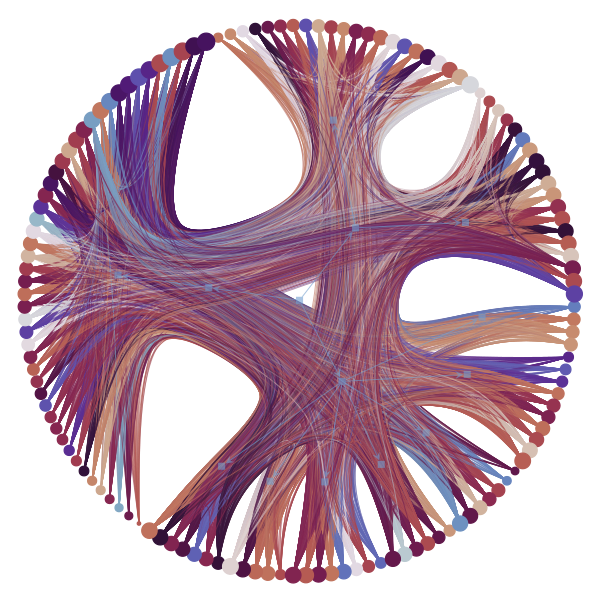

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x144346d50, at 0x143eea250>,
 <Graph object, directed, with 150 vertices and 149 edges at 0x14407a410>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x14407a410, at 0x143eeacd0>)

In [61]:
m1_baseline_state.draw(vertex_fill_color=m1_baseline_colors,
                       vertex_color=m1_baseline_colors)
#                    output='v1_baseline.png')
# baseline_state.draw(vertex_fill_color=baseline_colors,
#                     vertex_color=baseline_colors,
#                     output='v1_baseline.pdf')

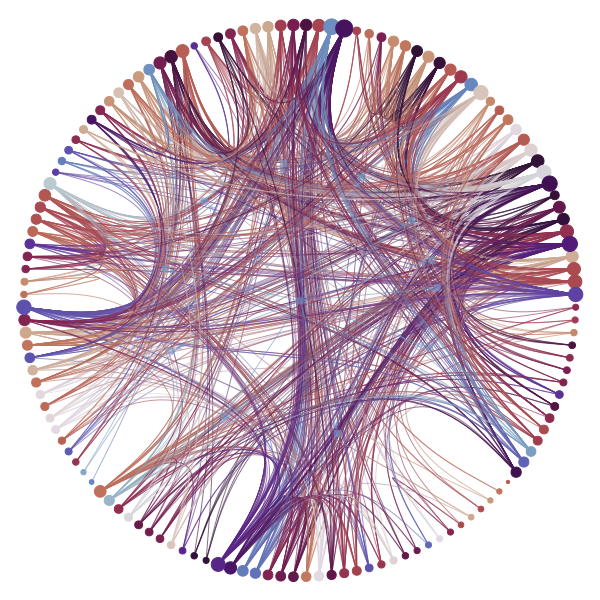

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16c179ad0, at 0x144353c10>,
 <Graph object, directed, with 148 vertices and 147 edges at 0x10a154c50>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x10a154c50, at 0x144077a10>)

In [62]:
m1_uoi_state.draw(vertex_fill_color=m1_uoi_colors,
                       vertex_color=m1_uoi_colors)